<a href="https://colab.research.google.com/github/dwirefarianto/data-analytics-created-projects/blob/main/VGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sklearn as sk
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


from sklearn.pipeline import make_pipeline
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [ ]:
#Import dataset csv format from google drive
sheet_url = 'https://drive.google.com/file/d/1rsBNZdo4_joPn9_iUOJJWKgo6OhL0YHn/view?usp=sharing' #assign link to a variable
sheet_url_replace = 'https://drive.google.com/uc?id=' + sheet_url.split('/')[-2] #replace the link
print(sheet_url_replace)

vgs = pd.read_csv(sheet_url_replace) #Import/read the csv file into pandas dataframe
vgs.head()

https://drive.google.com/uc?id=1rsBNZdo4_joPn9_iUOJJWKgo6OhL0YHn


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data Dictionary

* **Rank** = Rank of Global Sales
* **Name** = Name of Video Game
* **Platform** = Platform that released video game
* **Year** = Year of release
* **Genre** = Genre of video game
* **Publisher** = Name of publisher
* **NA_Sales** = Sales of North America in millions
* **EU_Sales** = Sales of Europe in millions
* **JP_Sales** = Sales of Japan in millions
* **Other_Sales** = Sales of Other Region
* **Global_Sales** = Global Sales

# Data Cleaning

In [ ]:
vgs_clean = vgs.copy()

In [ ]:
# structure of data

print(vgs_clean.isna().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [ ]:
# calculate the mean value of the recorded years and replace the null values with this mean.

vgs_clean["Year"] = vgs_clean["Year"].fillna(vgs_clean["Year"].mean())

In [ ]:
print(vgs_clean.isna().sum())

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64


In [ ]:
# Perform this deletion using "dropna," and by using "shape,"

vgs_clean = vgs_clean.dropna()

print(vgs_clean.isna().sum(), '\n')

print('Total rows and columns:',vgs_clean.shape)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64 

Total rows and columns: (16540, 11)


In [ ]:
vgs_clean.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [ ]:
#change Year to integer

vgs_clean["Year"] = vgs_clean["Year"].astype('int64')

In [ ]:
vgs_clean.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [ ]:
vgs_clean.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000
mean,8294.197642,2006.399456,0.265079,0.146883,0.077998,0.048191,0.538426
std,4790.703200,5.788552,0.817929,0.506129,0.309800,0.188879,1.557424
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4143.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12440.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Exporting Dataset

In [ ]:
vgs_clean

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
from google.colab import files
vgs_clean.to_csv('clean_vgsales.csv')
files.download('clean_vgsales.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# EDA

## Trend of global sales year by year

In [ ]:
sales_by_year = vgs_clean.groupby('Year')['Global_Sales'].sum()
sales_by_year

Year
1980     11.38
1981     35.77
1982     28.86
1983     16.79
1984     50.36
1985     53.94
1986     37.07
1987     21.74
1988     47.22
1989     73.45
1990     49.39
1991     32.23
1992     76.16
1993     45.98
1994     79.17
1995     88.11
1996    199.15
1997    200.98
1998    256.47
1999    251.27
2000    201.56
2001    331.47
2002    395.52
2003    357.85
2004    414.01
2005    458.51
2006    614.63
2007    609.92
2008    678.90
2009    667.30
2010    600.29
2011    515.80
2012    363.49
2013    368.11
2014    337.03
2015    264.44
2016     70.90
2017      0.05
2020      0.29
Name: Global_Sales, dtype: float64

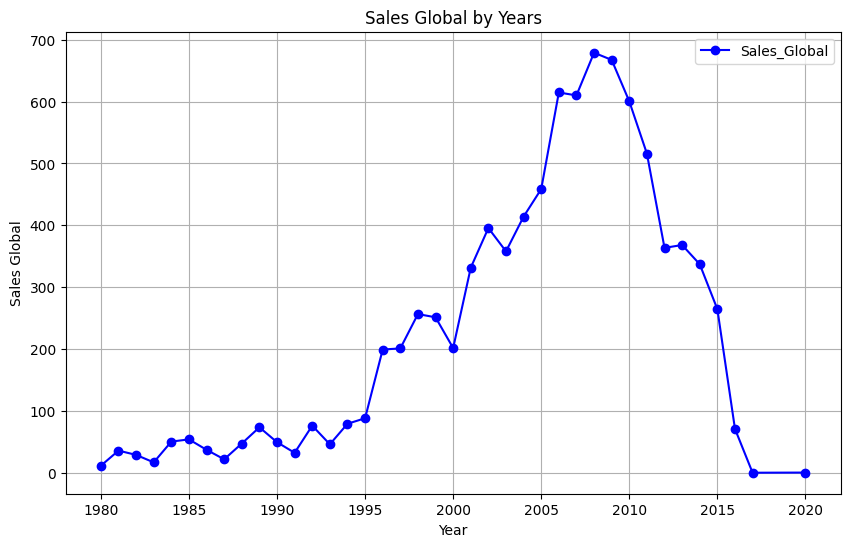

In [ ]:
sales_by_year = vgs_clean.groupby('Year')['Global_Sales'].sum()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(sales_by_year.index, sales_by_year.values, linestyle='solid', marker='o', color='b', label='Sales_Global')

ax.set_xlabel('Year')
ax.set_ylabel('Sales Global')
ax.set_title('Sales Global by Years')

ax.legend()
plt.grid(True)

plt.show()

In this graph, we can observe that sales have been on the rise over the years, with the highest point being in 2008. However, starting from this year, sales begin to decline, with zero sales recorded between 2015 and 2020. This could be due to the data not being recorded in this time range or that, starting from a certain year, the entity responsible for recording this information has ceased to do so or lacked the resources to continue this work actively. It's important to consider these factors when interpreting the data.

## Trend of each region sales year by year

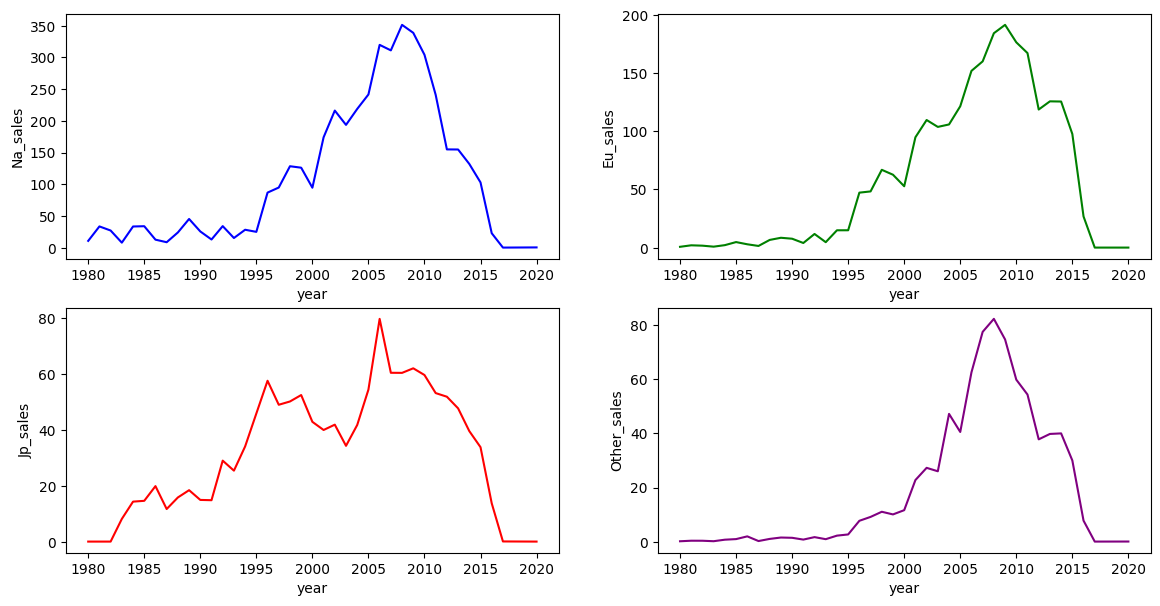

In [ ]:
na_sales_year = vgs_clean.groupby("Year")["NA_Sales"].sum()
eu_sales_year = vgs_clean.groupby("Year")["EU_Sales"].sum()
jp_sales_year = vgs_clean.groupby("Year")["JP_Sales"].sum()
other_sales_year = vgs_clean.groupby("Year")["Other_Sales"].sum()

fig, ax = plt.subplots(2, 2, figsize=(14,7))

ax[0,0].plot(na_sales_year.index, na_sales_year.values, color="blue")
ax[0,1].plot(eu_sales_year.index, eu_sales_year.values, color="green")
ax[1,0].plot(jp_sales_year.index, jp_sales_year.values, color="red")
ax[1,1].plot(other_sales_year.index, other_sales_year.values, color="purple")

ax[0,0].set_xlabel("year")
ax[0,1].set_xlabel("year")
ax[1,0].set_xlabel("year")
ax[1,1].set_xlabel("year")

ax[0,0].set_ylabel("Na_sales")
ax[0,1].set_ylabel("Eu_sales")
ax[1,0].set_ylabel("Jp_sales")
ax[1,1].set_ylabel("Other_sales")

plt.show()

In the regional evaluation, we can observe a similar upward trend as in the global assessment. It's worth noting the growth in sales in Japan, where we can see a decline in sales compared to other regions between 1998 and 2004. Due to the lack of information, we cannot draw a conclusion about what happened during this period. We cannot determine, for example, if there was a shift in trends due to changes in leisure preferences or other factors. Additional data or research would be needed to understand the specific reasons behind this fluctuation.

## Best-selling video games

In [ ]:
top_games_sales = vgs_clean[vgs_clean["Rank"] <= 20]

fig = px.bar(top_games_sales, x="Name", y="Global_Sales",color = "Publisher", title="Top 10 Global Sales Games")
fig.show()

## Global Sales by genre

In [ ]:
genre_sales = vgs_clean.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False).reset_index()

genre_sales

,Genre,Global_Sales
0,Action,1750.33
1,Sports,1329.35
2,Shooter,1037.32
3,Role-Playing,927.31
4,Platform,830.87
5,Misc,802.15
6,Racing,732.03
7,Fighting,445.70
8,Simulation,391.96
9,Puzzle,244.94


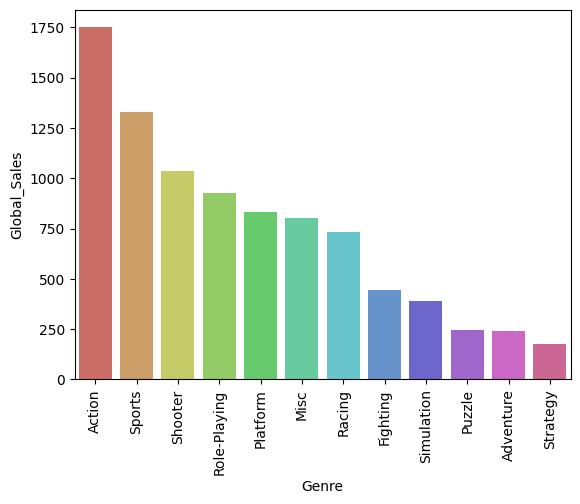

In [ ]:
genre_sales = vgs_clean.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False).reset_index()

genre_sales

sns.barplot(data = genre_sales, x="Genre", y="Global_Sales", palette="hls")

plt.xticks(rotation=90)
plt.show()

## Global Sales by platforms

In [ ]:
platform_sales = vgs_clean.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).reset_index()

platform_sales

,Platform,Global_Sales
0,PS2,1252.43
1,X360,979.89
2,PS3,957.29
3,Wii,926.36
4,DS,822.19
5,PS,729.07
6,GBA,310.29
7,PSP,296.10
8,PS4,278.10
9,PC,258.46


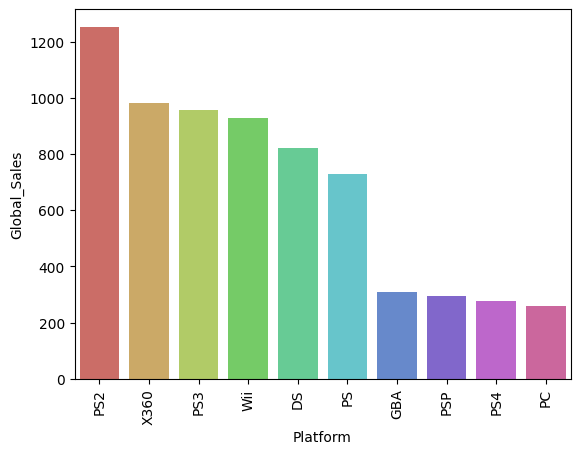

In [ ]:
platform_sales = vgs_clean.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(10).reset_index()

sns.barplot(data = platform_sales, x="Platform", y="Global_Sales", palette="hls")

plt.xticks(rotation=90)
plt.show()

## Genre distribution within a platform

In [ ]:
ps2_platform = vgs_clean[vgs_clean["Platform"] == "PS2"]

ps2_platform_sales = ps2_platform.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False).reset_index()

fig = px.pie(ps2_platform_sales, values = "Global_Sales", names = "Genre", title = "Genres in PS2")

fig.show()

In [ ]:
X360_platform = vgs_clean[vgs_clean["Platform"] == "X360"]

X360_platform_sales = X360_platform.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False).reset_index()

fig = px.pie(X360_platform_sales, values = "Global_Sales", names = "Genre", title = "Genres in X360")

fig.show()

In [ ]:
ps3_platform = vgs_clean[vgs_clean["Platform"] == "PS3"]

ps3_platform_sales = ps3_platform.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False).reset_index()

fig = px.pie(ps3_platform_sales, values = "Global_Sales", names = "Genre", title = "Genres in PS3")

fig.show()

In [ ]:
ps4_platform = vgs_clean[vgs_clean["Platform"] == "PS4"]

ps4_platform_sales = ps4_platform.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False).reset_index()

fig = px.pie(ps4_platform_sales, values = "Global_Sales", names = "Genre", title = "Genres in PS4")

fig.show()

## Sales generated by a genre on various platforms

In [ ]:
action_genre = vgs_clean[vgs_clean["Genre"] == "Action"]

action_genre_sales = action_genre.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).reset_index()

fig = px.bar(action_genre_sales, x="Platform",y="Global_Sales", title = "Action Sales in Platform")

fig.show()

## Comparing sales by regions between two platforms

In [ ]:
ps3_vs_x360 = vgs_clean[(vgs_clean["Platform"]== "PS3") | (vgs_clean["Platform"]=="X360")]

ps3_vs_x360_per_region = ps3_vs_x360.groupby("Platform")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()

fig = px.bar(ps3_vs_x360_per_region, barmode="relative")
fig.update_layout(title="Sales by Region PS3 vs X360", xaxis_title="Platform", yaxis_title="Sales", legend_title="Region")
fig.show()

In [ ]:
ps4_vs_xone = vgs_clean[(vgs_clean["Platform"]== "PS4") | (vgs_clean["Platform"]=="XOne")]

ps4_vs_xone_per_region = ps4_vs_xone.groupby("Platform")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()

fig = px.bar(ps4_vs_xone_per_region, barmode="relative")
fig.update_layout(title="Sales by Region PS4 vs XOne", xaxis_title="Platform", yaxis_title="Sales", legend_title="Region")
fig.show()